In [335]:
import numpy as np
import pandas as pd
import scipy
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle

In [340]:
data_existing = pd.read_csv('/Users/temidayo/downloads/Existing_employees.csv', index_col=0)
data_left = pd.read_csv('/Users/temidayo/downloads/Employee_who_have_left.csv', index_col=0)

In [263]:
data_existing.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,Salary,salary level
Emp ID,,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,sales,1,low
2002,0.82,0.67,2,202,3,0,0,sales,1,low
2003,0.45,0.69,5,193,3,0,0,sales,1,low
2004,0.78,0.82,5,247,3,0,0,sales,1,low
2005,0.49,0.60,3,214,2,0,0,sales,1,low


In [264]:
data_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Salary,salary level,dept
Emp ID,,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,1,low,sales
2,0.80,0.86,5,262,6,0,0,3,medium,sales
3,0.11,0.88,7,272,4,0,0,3,medium,sales
4,0.72,0.87,5,223,5,0,0,1,low,sales
5,0.37,0.52,2,159,3,0,0,1,low,sales


In [275]:
data_left.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Salary
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.760571
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759,0.959150
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000,1.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000,1.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000,1.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000,3.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,3.000000


In [276]:
data_existing.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Salary
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.650945
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889,0.655277
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,1.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000,1.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000,2.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000,3.000000


In [278]:
data_left.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Salary
satisfaction_level,1.000000,0.182295,-0.227113,-0.084117,0.446440,0.005864,0.005516,-0.005019
last_evaluation,0.182295,1.000000,0.804155,0.830336,0.783873,-0.001875,-0.047992,0.016157
number_project,-0.227113,0.804155,1.000000,0.875194,0.601989,-0.008401,-0.032301,0.018866
average_montly_hours,-0.084117,0.830336,0.875194,1.000000,0.664011,-0.009048,-0.035475,0.021938
time_spend_company,0.446440,0.783873,0.601989,0.664011,1.000000,0.005222,-0.045888,0.006993
Work_accident,0.005864,-0.001875,-0.008401,-0.009048,0.005222,1.000000,0.056214,0.026766
promotion_last_5years,0.005516,-0.047992,-0.032301,-0.035475,-0.045888,0.056214,1.000000,-0.017865
Salary,-0.005019,0.016157,0.018866,0.021938,0.006993,0.026766,-0.017865,1.000000


In [279]:
data_existing.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Salary
satisfaction_level,1.000000,0.086357,-0.092799,0.055354,-0.168791,-0.003128,0.001228,-0.014700
last_evaluation,0.086357,1.000000,0.040306,0.090304,-0.017682,-0.007416,-0.002034,-0.013129
number_project,-0.092799,0.040306,1.000000,0.070289,0.079943,0.001098,0.001676,0.001909
average_montly_hours,0.055354,0.090304,0.070289,1.000000,-0.016444,0.003285,0.007871,0.011007
time_spend_company,-0.168791,-0.017682,0.079943,-0.016444,1.000000,0.027261,0.088629,0.086416
Work_accident,-0.003128,-0.007416,0.001098,0.003285,0.027261,1.000000,0.028084,-0.019291
promotion_last_5years,0.001228,-0.002034,0.001676,0.007871,0.088629,0.028084,1.000000,0.104171
Salary,-0.014700,-0.013129,0.001909,0.011007,0.086416,-0.019291,0.104171,1.000000


# CORRELATION VISUALIZATION

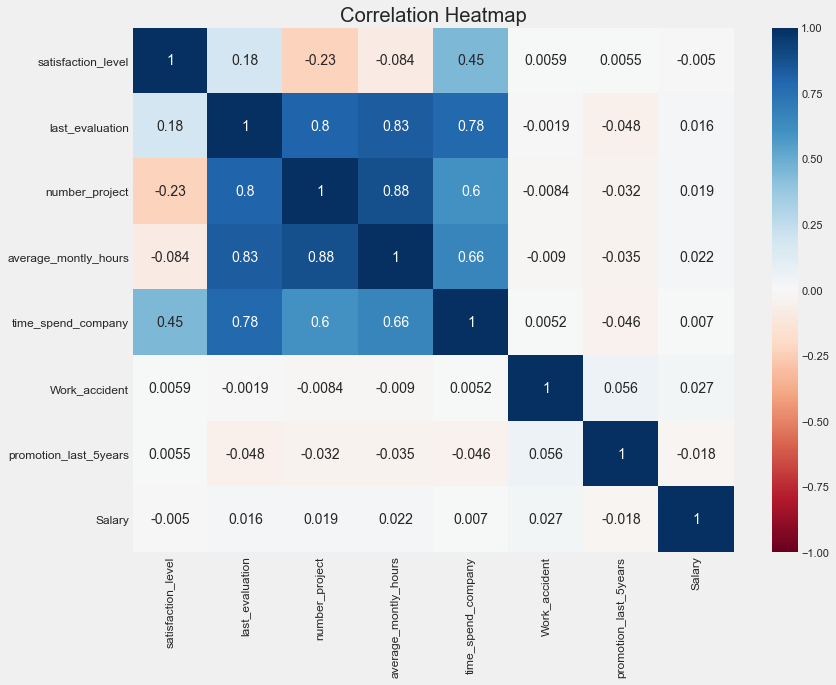

In [280]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(data_left.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Visualization of raw data')

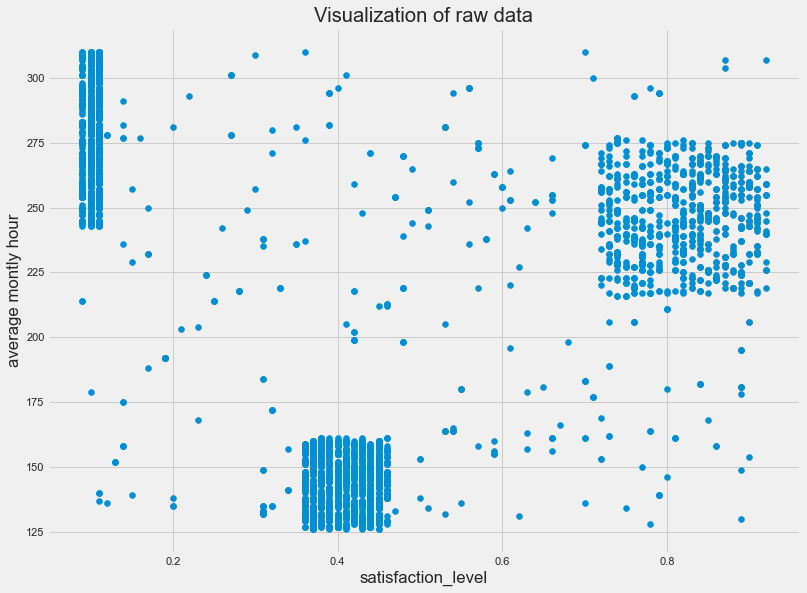

In [330]:
plt.figure(figsize = (12, 9))
plt.scatter(data_left.iloc[:, 0], data_left.iloc[:, 3])
plt.xlabel('satisfaction_level')
plt.ylabel('average montly hour')
plt.title('Visualization of raw data')

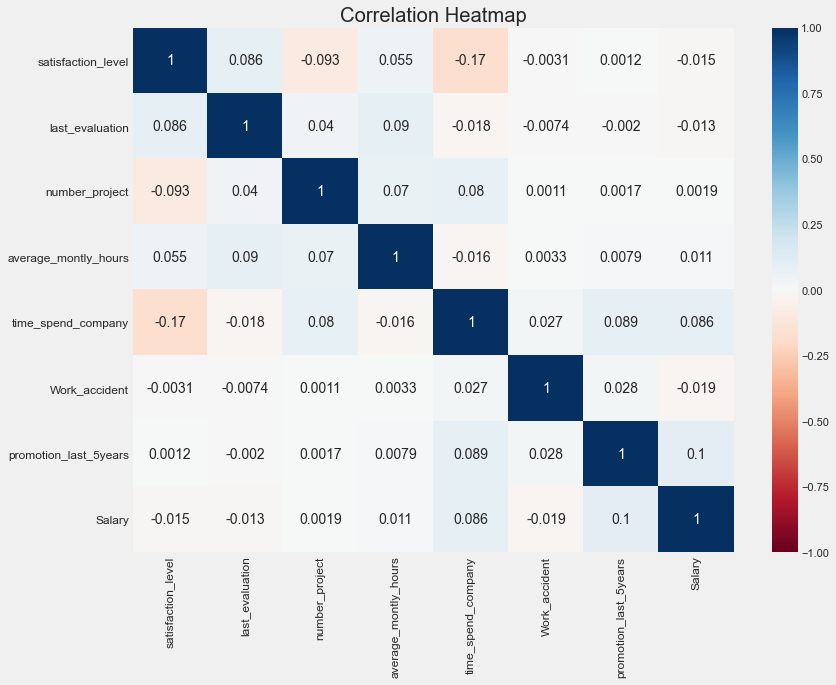

In [329]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(data_existing.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Visualization of raw data')

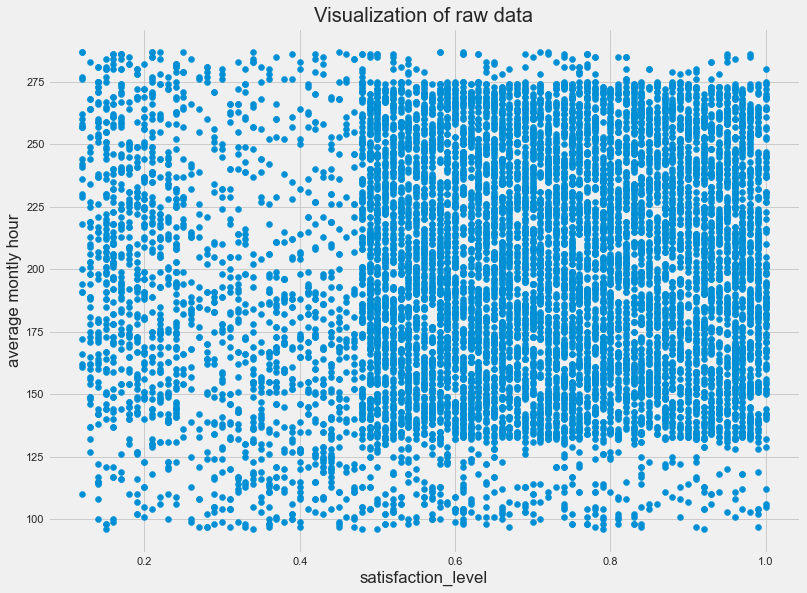

In [332]:
plt.figure(figsize = (12, 9))
plt.scatter(data_existing.iloc[:, 0], data_existing.iloc[:, 3])
plt.xlabel('satisfaction_level')
plt.ylabel('average montly hour')
plt.title('Visualization of raw data')

In [265]:
dept_count=DataFrame(data_existing.groupby(['dept'])['dept'].count())



In [268]:
print(dept_count)


             dept
dept             
IT            273
RandD         121
accounting    204
hr            215
management     91
marketing     203
product_mng   198
sales        1014
support       555
technical     697


In [231]:
print(dept_count1)

             dept count
dept                   
IT                  273
RandD               121
accounting          204
hr                  215
management           91
marketing           203
product_mng         198
sales              1014
support             555
technical           697


/Users/temidayo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


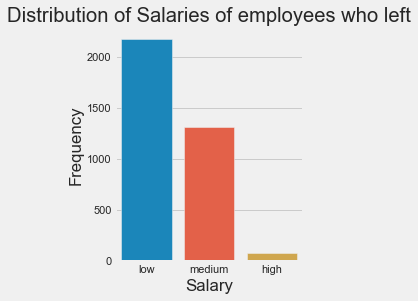

/Users/temidayo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


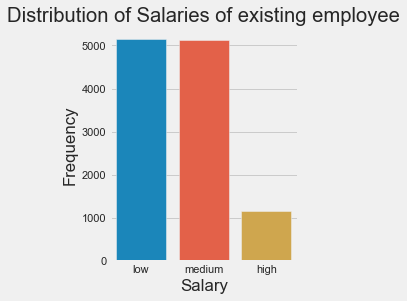

In [298]:
plt.figure(figsize = (3,4))
sns.countplot(data_left['salary level'])
plt.title('Distribution of Salaries of employees who left')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.style.use('fivethirtyeight')
plt.show()

plt.figure(figsize = (3,4))
sns.countplot(data_existing['salary level'])
plt.title('Distribution of Salaries of existing employee')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.style.use('fivethirtyeight')
plt.show()

/Users/temidayo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


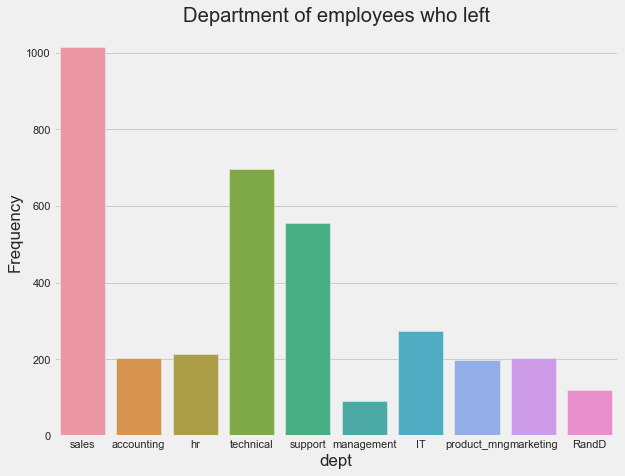

/Users/temidayo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


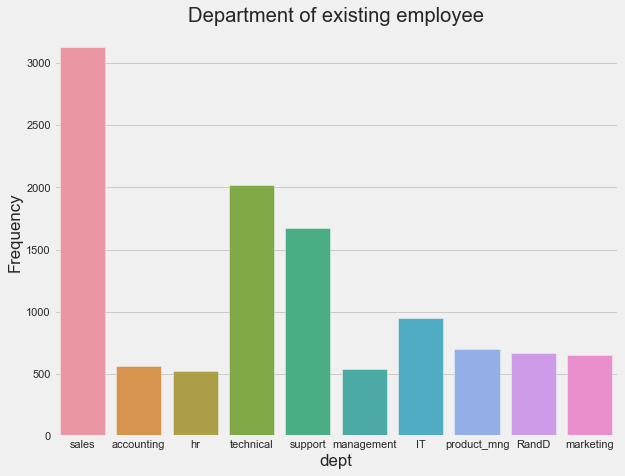

In [299]:
plt.figure(figsize = (9,7))
sns.countplot(data_left['dept'])
plt.title('Department of employees who left')
plt.xlabel('dept')
plt.ylabel('Frequency')
plt.style.use('fivethirtyeight')
plt.show()

plt.figure(figsize = (9,7))
sns.countplot(data_existing['dept'])
plt.title('Department of existing employee')
plt.xlabel('dept')
plt.ylabel('Frequency')
plt.style.use('fivethirtyeight')
plt.show()

In [145]:
dept_count.rename(columns={'dept':'dept count'})

,dept count
dept,
IT,273
RandD,121
accounting,204
hr,215
management,91
marketing,203
product_mng,198
sales,1014
support,555


In [338]:
salary_level= DataFrame(data.groupby(['salary level'])['salary level'].count())
print(salary_level)

              salary level
salary level              
high                    82
low                   2172
medium                1317


In [343]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data_left)

In [344]:
hier_clust = linkage(segmentation_std, method = 'ward')

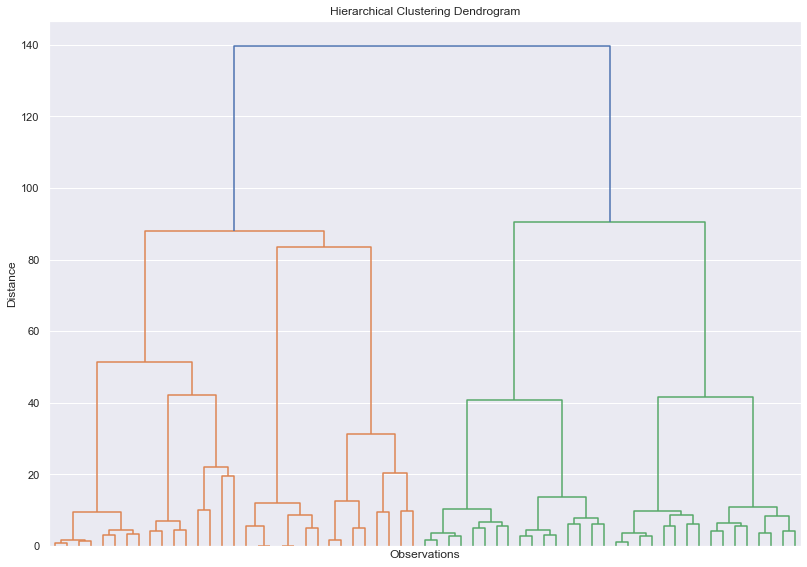

In [345]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

K means 

In [434]:
wcss = []
for i in range(1,9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 25)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

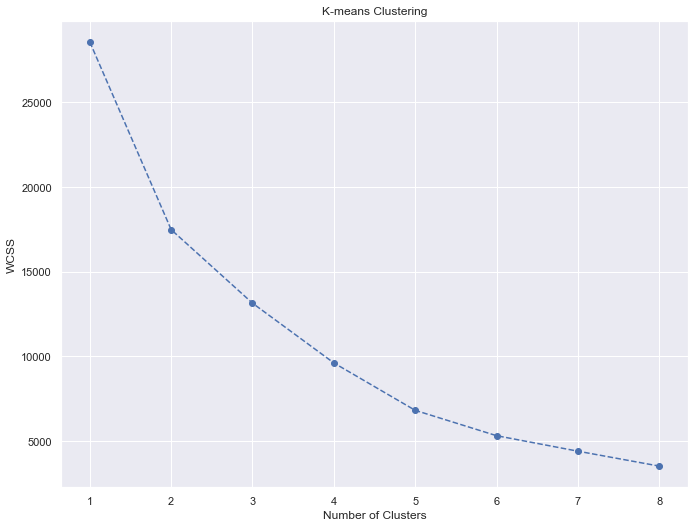

In [435]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 9), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [412]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 25)

In [413]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=25)

In [414]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [415]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Segment K-means,,,,,,,
0,0.806225,0.911251,4.529718,242.664234,5.157456,0.047967,0.0
1,0.412923,0.523740,2.125686,148.749237,3.010372,0.045760,0.0
2,0.118344,0.860482,6.165618,273.377358,4.089099,0.046122,0.0
3,0.460000,0.588421,3.052632,177.736842,3.263158,0.210526,1.0


In [416]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','satisfaction_level']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [417]:
df_segm_analysis

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.806225,0.911251,4.529718,242.664234,5.157456,0.047967,0.0,959,0.268552
1,0.412923,0.523740,2.125686,148.749237,3.010372,0.045760,0.0,1639,0.458975
2,0.118344,0.860482,6.165618,273.377358,4.089099,0.046122,0.0,954,0.267152
3,0.460000,0.588421,3.052632,177.736842,3.263158,0.210526,1.0,19,0.005321


In [418]:
df_segm_analysis.rename({0:'Job Satisfaction',
                         1:'under-utilized',
                         2:'larger work hour/ number of project',
                         3:'promotion'})

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,N Obs,Prop Obs
Segment K-means,,,,,,,,,
Job Satisfaction,0.806225,0.911251,4.529718,242.664234,5.157456,0.047967,0.0,959,0.268552
under-utilized,0.412923,0.523740,2.125686,148.749237,3.010372,0.045760,0.0,1639,0.458975
larger work hour/ number of project,0.118344,0.860482,6.165618,273.377358,4.089099,0.046122,0.0,954,0.267152
promotion,0.460000,0.588421,3.052632,177.736842,3.263158,0.210526,1.0,19,0.005321


In [419]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'Job Satisfaction',
                         1:'under-utilized',
                         2:'larger work hour/ number of project',
                         3:'promotion'})

/Users/temidayo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


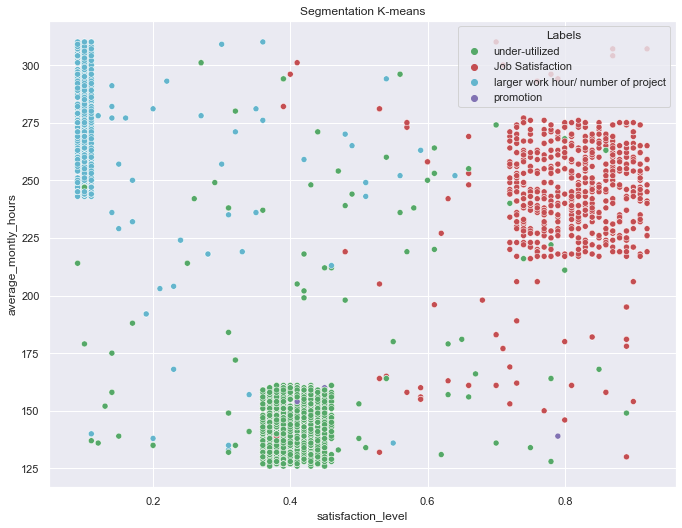

In [436]:
x_axis = df_segm_kmeans['satisfaction_level']
y_axis = df_segm_kmeans['average_montly_hours']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

Principality Component Analysis

In [437]:
pca = PCA()

In [438]:
pca.fit(segmentation_std)

PCA()

In [439]:
pca.explained_variance_ratio_

array([0.41238844, 0.16326369, 0.13194188, 0.12645236, 0.11614959,
       0.02146071, 0.01632032, 0.01202301])

Text(0, 0.5, 'Cumulative Explained Variance')

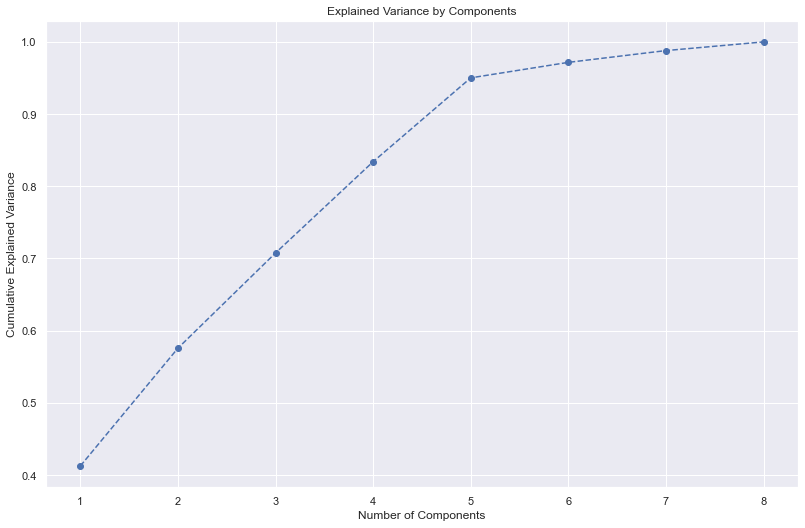

In [440]:
plt.figure(figsize = (12,8))
plt.plot(range(1,9), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [449]:
pca = PCA(n_components = 4)

In [450]:
pca.fit(segmentation_std)

PCA(n_components=4)